In [24]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import BatchNormalization


In [2]:
df = pd.read_csv("cancer_risk.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   bmi                      1000 non-null   float64
 3   smoker                   1000 non-null   object 
 4   alcohol_consumption      605 non-null    object 
 5   diet_type                1000 non-null   object 
 6   physical_activity_level  1000 non-null   object 
 7   family_history           1000 non-null   object 
 8   mental_stress_level      1000 non-null   object 
 9   sleep_hours              1000 non-null   float64
 10  regular_health_checkup   1000 non-null   object 
 11  prostate_exam_done       1000 non-null   object 
 12  risk_level               1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


In [5]:
df.isnull().sum()

id                           0
age                          0
bmi                          0
smoker                       0
alcohol_consumption        395
diet_type                    0
physical_activity_level      0
family_history               0
mental_stress_level          0
sleep_hours                  0
regular_health_checkup       0
prostate_exam_done           0
risk_level                   0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Unknown')
df['alcohol_consumption'] = df['alcohol_consumption'].astype('category')

In [8]:
df.drop('id', axis=1, inplace=True)

In [9]:
df.head(5)

,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
0,39,24.7,No,Unknown,Fatty,Moderate,No,High,5.6,No,No,Medium
1,43,25.6,Yes,Unknown,Mixed,High,No,High,6.9,Yes,No,Low
2,72,22.4,No,Moderate,Mixed,Moderate,No,High,7.8,Yes,No,Low
3,60,25.6,Yes,Unknown,Fatty,Moderate,No,High,5.6,Yes,No,Medium
4,51,26.6,Yes,Unknown,Mixed,Low,No,Medium,5.9,No,No,Medium


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1000 non-null   int64   
 1   bmi                      1000 non-null   float64 
 2   smoker                   1000 non-null   object  
 3   alcohol_consumption      1000 non-null   category
 4   diet_type                1000 non-null   object  
 5   physical_activity_level  1000 non-null   object  
 6   family_history           1000 non-null   object  
 7   mental_stress_level      1000 non-null   object  
 8   sleep_hours              1000 non-null   float64 
 9   regular_health_checkup   1000 non-null   object  
 10  prostate_exam_done       1000 non-null   object  
 11  risk_level               1000 non-null   object  
dtypes: category(1), float64(2), int64(1), object(8)
memory usage: 87.2+ KB


In [11]:
df.shape

(1000, 12)

In [12]:
X = df.drop('risk_level', axis=1)
y = df['risk_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Categorical columns to ordinal encode in X
ordinal_cols = [
    'smoker',
    'alcohol_consumption',
    'diet_type',
    'physical_activity_level',
    'family_history',
    'mental_stress_level',
    'regular_health_checkup',
    'prostate_exam_done'
]

# Numerical columns to standardize
numeric_cols = ['age', 'bmi', 'sleep_hours']

# Target column
label_col = ['risk_level']


In [14]:
transformer_X = ColumnTransformer(
    transformers=[
        ("Ord_Enc", OrdinalEncoder(), ordinal_cols),
        ("STD_Scaler", StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)

X_train_transformed = transformer_X.fit_transform(X_train)
X_test_transformed = transformer_X.transform(X_test)


In [15]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [37]:
import joblib

In [38]:
joblib.dump(transformer_X, "transformer_X.pkl")
# Save the label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [42]:
joblib.dump(transformer_X, "transformer_X.pkl")

['transformer_X.pkl']

In [18]:
num_classes = len(set(y_train_encoded))
y_train_cat = to_categorical(y_train_encoded, num_classes=num_classes)

In [25]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 32)               

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train_transformed, y_train_encoded, validation_split=0.2, epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 45ms/step - loss: 1.6095 - accuracy: 0.3906 - val_loss: 1.1925 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 0s 23ms/step - loss: 1.3295 - accuracy: 0.4516 - val_loss: 1.0771 - val_accuracy: 0.5500
Epoch 3/100
20/20 [==============================] - 0s 12ms/step - loss: 1.1166 - accuracy: 0.5531 - val_loss: 0.9920 - val_accuracy: 0.5688
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.9829 - accuracy: 0.5859 - val_loss: 0.9290 - val_accuracy: 0.6000
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.8767 - accuracy: 0.6172 - val_loss: 0.8754 - val_accuracy: 0.6313
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.8547 - accuracy: 0.6391 - val_loss: 0.8292 - val_accuracy: 0.6438
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.8122 - accuracy: 0.6734 - val_loss: 0.7832 - val_accuracy: 0.6438
Epoch 

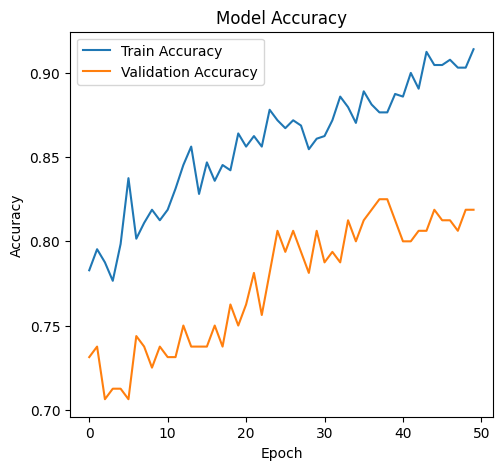

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



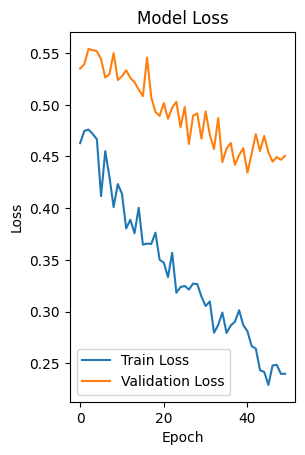

In [33]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
# Save model to HDF5 format
model.save("my_model.h5")  # You can use any name